## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** 
- No, Smartcab does not move during the simulation trial. However the trial has finished and the new trial has started, it takes new position in the grid. So, during a particular trial, agent doesnot move. 
- Agent is receving positive and negative rewards. 
- Whenever agent is idled at the red light, it is reward with positive number. Whereas when the agent is idling at green light, with no oncoming traffic, it has high negative reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

# Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 
- In the `agent.py` the class `LearningAgent` has three flags: (1) `learning` which is initialized to `False`. If we were implement the learning for the agent using say Q-learning, this Flag has to be set to `True`. (2) `alpha` is the learning rate or discounted factor. This gives the preference of an agent for current rewards over future rewards. In other words if `alpha`=1, then discounted rewards is equal to future rewards and if `alpha`=0, then the future rewards are insignificant. 0<= `alpha`<1. (3) $\epsilon$ (`eplison`) is used as the decay function such as exponential function.
There are other flags for Environment class, such as `verbose`, if set `True` will display the details of each simulation step. `num_dummies` is the number of other cars in the environment. This can be like traffic. `grid_size` is the area of the enviroment.
- The class function `act` is called when an agent performs an specified action. The input arguments to the function are agent and action. This function returns the reward based on the traffic laws. For instance if `action==forward`, then traffic laws are validated and if trhe action is valid move then the rewards are assigned accordingly and the metrics are updated for the time step.
- `render_text()` basically displays the status of the agent on the command line or the console, when the `agent.py` is run. It basically displays what agent is doing, how it is rewarded and finally if agent is working in finite/in-finite horizon (enforced to meet a deadline or not). `render()` function essentially displays the time-steps, epsilon, indicates, whether it is testing or training trial, previous state and other parameters on the pygame GUI.
- `next_waypoint()` will consider East/west direction first and will consider the north/south direction next.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


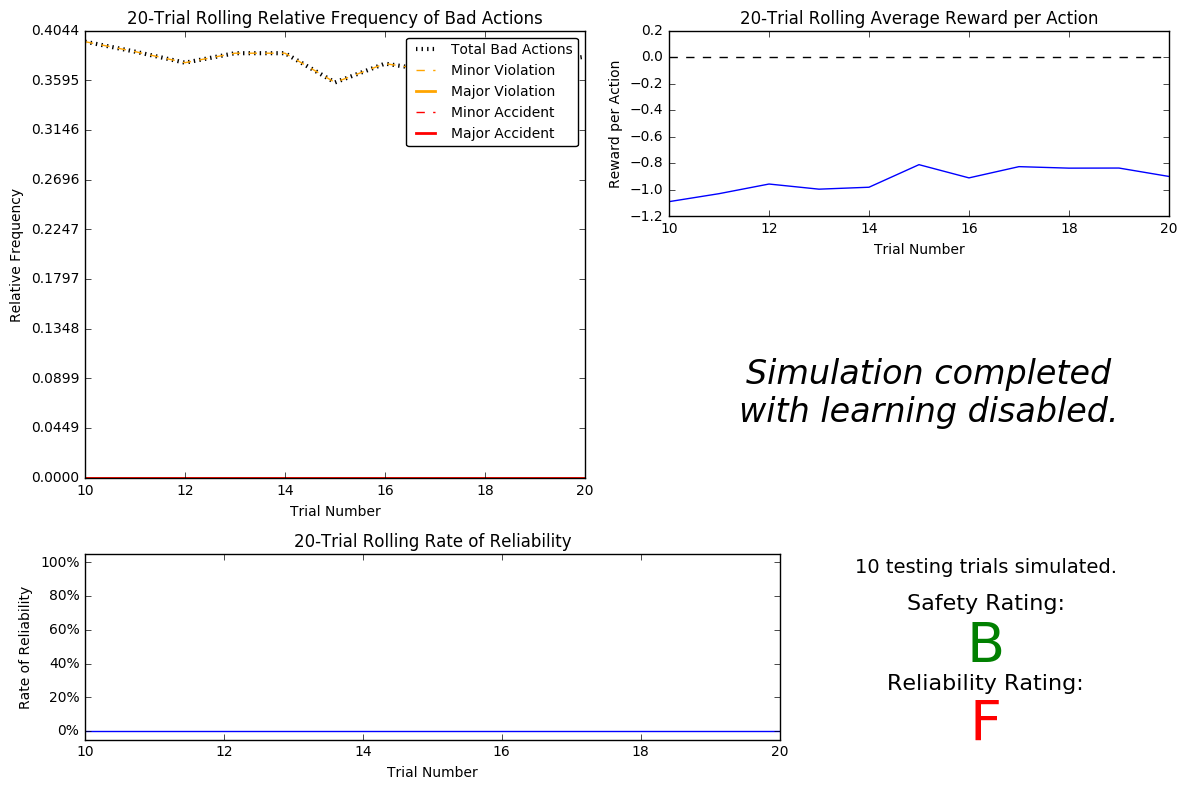

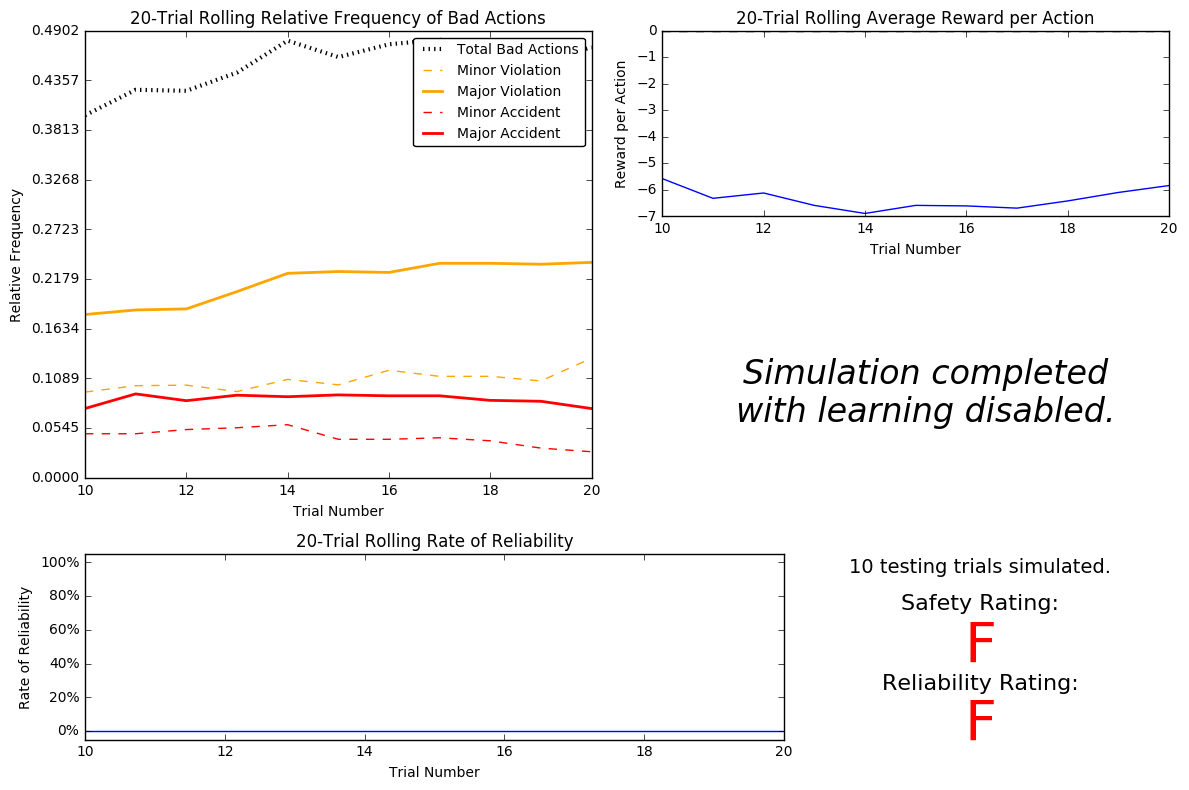

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning_no_actions.csv')
vs.plot_trials('sim_no-learning_random_actions.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** 
There are two plots above (1) without any action (2) with a random action. 

**No action**

- Driving agent is making bad decisions about 40% (sometimes >) for every trial in the experiment. And all these bad actions/decisions are causing minor-traffic volations. There are no accidents that are caused due to these bad decisions and this is because agent is not moving to the next state based on the action taken. So, all the minor voliations or bad decisions are caused due to non-movement of the agent under the green light.
- Reliability makes sense because, the agent is not moving during the simulation trial. Also, since we have enforced the deadline, driving agent will not meet the deadline in all the trials making 0% reliable and that agress with the reliability definition.
- Again, as the agent is not moving all voliations are minor violations, rewards are getting penalized accoordingly. For instance under Green light the agent is not moving causing the violation number 1 and reward is decreased by 5. However rewards from the plot (above) does not have large negative values because, by not moving the agent, it is getting rewarded positively during the red-light, and on-coming traffic.
- In this simulation environment NO. Though relative frequency of bad-actions (and minor violations) there is some change as the trails change, but that is because of the randomness. Reliability of the smartcab is constantly at 0%. The outcome here is whether the smartcab has reached the destination with the enforced time limit and the success is 0 for all trails.
- Smarcab is safe, as no major violations or accidents are reported. However, it highly unreliable, since no trial has meet the enforced dealine.

** Random action **
- Most of the observations for random action are similar to the No action. In 40% of the bad actions 5% are causing accidents (percentange of accidents in bad actions is 12.5%)
- Yes, given the agent is moving randomly, not necesssarly in the direction towards the destinnation, only some trials reach destination (only because of chance).
- Agent is being rewarded positively for taking right action at a given state and is being rewarded negatively for any viloations. Minor violations have small negative reward and major violations have larger negative impact. Agent is receiving significantly negative rewards, especially due to the major traffic violations and causing accidents.
- As the agent is not taking an action based on learning, increasing the trials will not change the results significantly.
- Smartcab is significantly unsafe. Since the actions taken are random and smartcab is not sensing the environment to act, it cannot be considered safe for a passenger. Also with the deadline enforced and the actions being random, we cannot ensure that smartcab is moving in a direction towards the destination. It can only reach destination by chance and it is totolly unreliable.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
- `waypoint` is important for both **safety** and **efficiency**. Smarcab has to safely maneuver to the next way-point and at the sametime it should ensure that next way-point is in shortest distance to the destination to provide high reliability or efficiency for the rider.
- `inputs` provide the sensing enviroment for the smartcab. This is an important feature for safety of the smartcab. `inputs` for the smartcab tell about the surroundings of the smartcab.  `oncoming` provides the information of the vechile across the intersection.  If it is not None it can move left, right or forward. `left` and `right` are the intended direction of the other vechicles around the smartcab. Given the traffic environment, all the vechiles drive on the right side of the road, intended direction of vechile to the `right` side does not happen here, since the grid space has only one lane and the smartcab is driving on the right side of the road. However the `oncoming` is very important features for safety of the smartcab. If there is an `oncoming` traffic, smartcab has to wait before moving to the next waypoint. `left` is also an important feature that can be included in the state space. However, here I choose to omit this feature so  state-space can be kept small, and smartcab can learn in a reasonable amount of iterations. Another important `input` smartcab needs to consider is the `light`. On RED samrtcab has to stop/wait and on GREEN it has to move.

- `deadline` provides the time left to reach the destination. Though this is a important feature, it is not needed for the smartcab to use it as a state. It does not provide any addition information to the smartcab. Sure, it tells us left over time to reach destination, but we are already using the shortest-distance (manhattan distance) to reach the destination and next waypoint actually gives that information. So `deadline` is kind of redundant in that sense. Also, the simulation evenironment operates in a unit-time steps, that means that if the deadline was included in the state space, the Q-table resulting that will be huge. For instance if the deadline for the smartcab is 100 time-units, then state space will be (>>100) at least 100. Using such a large state space, has many disadvantages: Smartcab require large amount of trials to learn, often many states may not be re-visited and the Q-table may not have converged.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 
- Next `waypoint` can have 4 states (left, right, forward, None). 
- `inputs`: `lights` we have 2 states (green,red)
- `inputs`: `oncoming` we have 4 states (left,right,forward,None).

This leaves as 4$\times2\times4$=32 possible unique combinations. However if the next `waypoint` is None, that means that the  smarcab remains in the same state as it was previously. So removing those 8 comibnations, we are left with 24 states that the smartcab can be in, for the choosen set of features. Yes, if the training set is large enough, each state could be visited by the agent number of times and it could learn the policy for each state.





### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

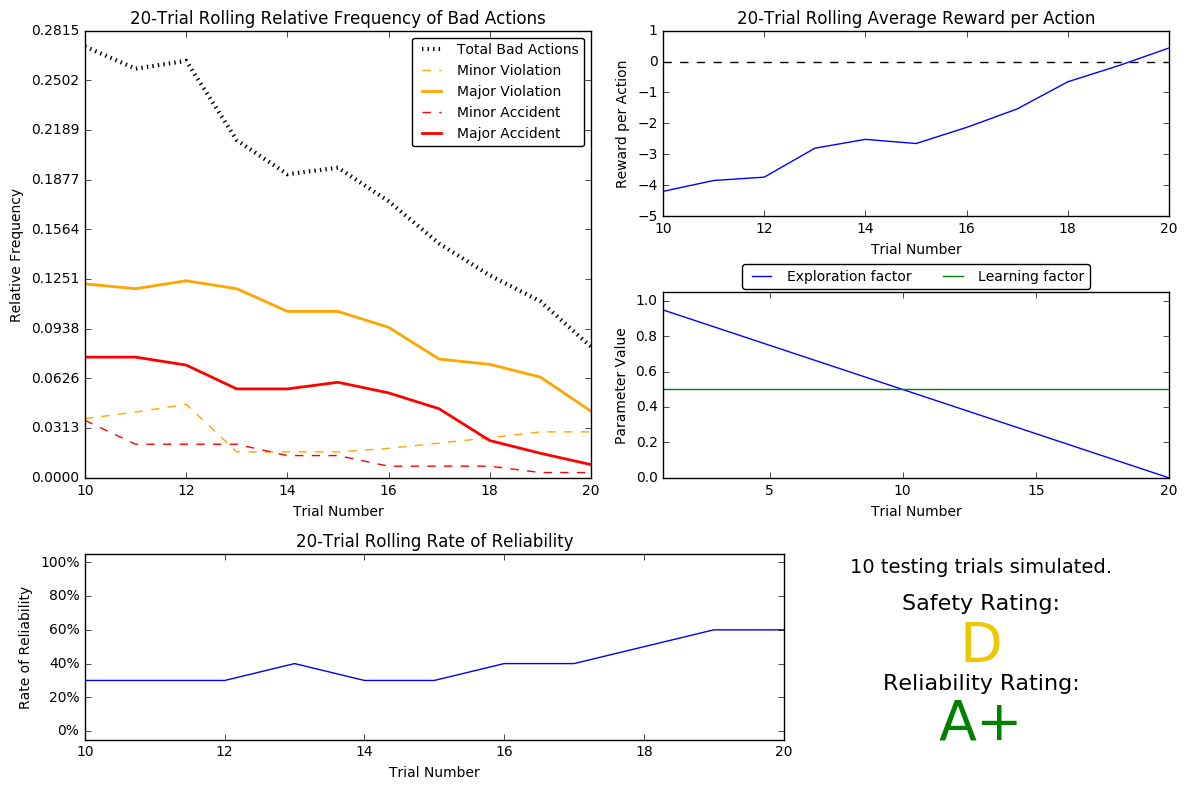

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- These observations are quite different from the basic driving agent. In default driving agent the bad actions are decreasing as the number of trials increases. This is because, the agent is learning based on the rewards it is getting by taking the actions that are maximizing reward value. Whereas in the basic driving agent the bad-actions are not decreasing as the number of trails increases.
- Driving agent has performed 20 training trials, before it began testing. Yes, it does make sense because, we have used the decaying epsilon in the steps of 0.05. We start with value 1 and at every trial we decrease the value by 0.05, and at 20th trial it becomes 0, where it becomes less than `tolerance` (the default value of 0.05).
- Yes, the plot for the exploration factor, the started with 1 and by 20th trial it is zero. Linear line with a negative slope.
- Yes, the bad actions are decreasing as the number of trials increases. Yes, the average reward has also increased.
- There is an improvement in the rating (test results) for the driving agent, both for safety and relability. Also, one must note that the number of training trials is small, so it might be possible that not all states are visited by the agent. By increasing the number of trials we can make sure the agent knows almost all states and know what to do. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

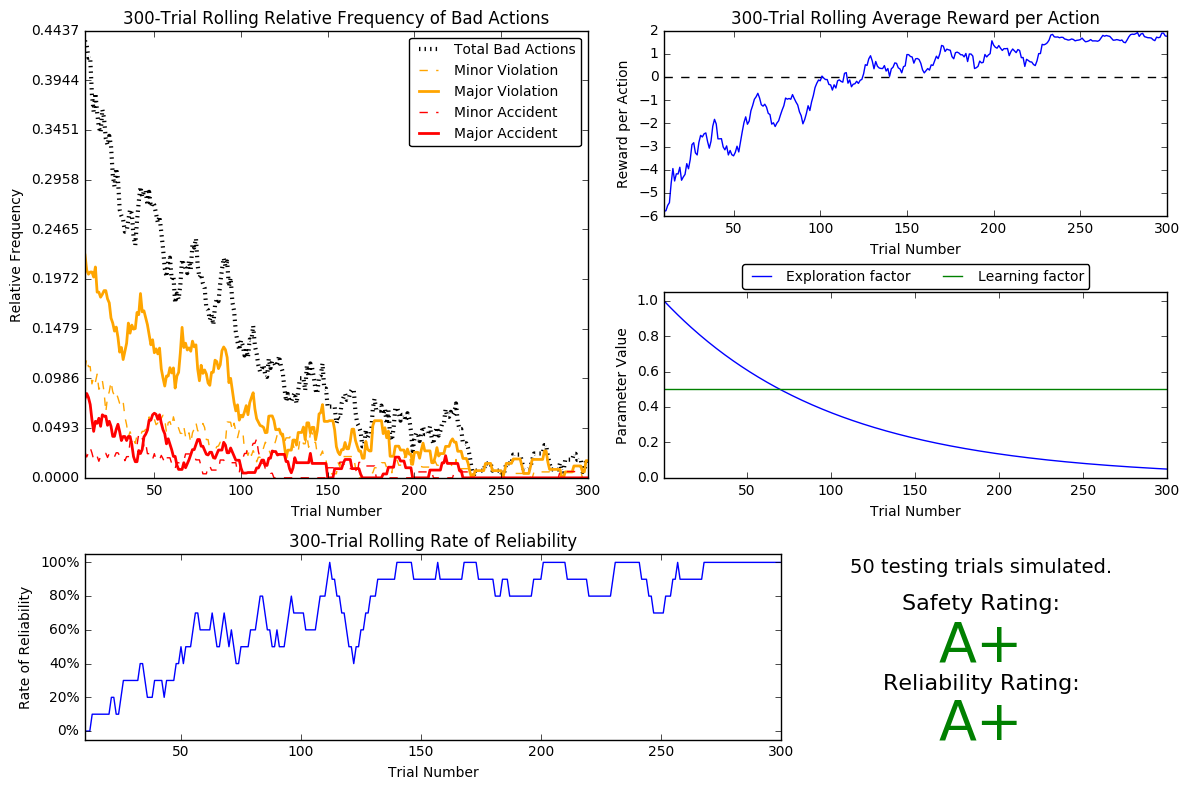

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- For the above result, the epsilon decaying function used as $a^{t}$, with value of a=0.99.
- Nearly 300 times the training trial was simulated before it began the testing process. For the used decaying function one can estimate the number of training trial as $\frac{\ln(\tau)}{\ln(a)}$ where $\tau$ is the epsilon-tolerance. For instance with a $\tau=0.05$ and a=0.99 we get number of trials are nearly 300.
- The learning rate $\alpha$ was set to the default value of 0.5 and the epsilon-tolerance ($\tau$) was 0.05. If $\alpha$ is close to 1, then the immediate reward that the agent is more than the previous reward and $\alpha$ is close to 0, then there no much reward for the agent moving to the new state. Having $\alpha=0.5$ weights equally the reward for immediate action and the previous action. For $\tau$, lower the value increases the number of trials that the experiment could run and there get the amount of traning needed for the smartcab.
- There has been a signicant improvement in the grades of the smartcab with this optmized Q-learner. Bascially, do the significant increase the training set, the smartcab was able to learn better.
- Yes, based on the training scores at the end of simulation, the percentage of major accidents has reduced to nearly zero and the percentage of average reliabilty of the smartcab is nearly 100.
- Yes, these results for safety and reliabilty are quite satisfactory.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
- For instance if the state is (`waypoint`=left,`light`=green,`oncoming`=forward), smartcab has to move to the left, but moving to the left with the oncoming traffic in the forward direction would involve a major violation (accident), in such case smartcab has two choices, it can go right or forward. However going right will be moving in an opposite direction to the destination and it would reduce the reliabilty of the smartcab. Thus intutively one can say that the optimal policy would be to take a forward action. 

- `sim_improved-learning.txt` is the Q-table. It indicates the action to taken by the smartcab in any given state, such that the rewards are maximized. Yes, for each of the 24 states, the optimal policy is choosen as the maximum value amoung the four-possible actions.
- For the state (`waypoint`=left,`light`=green,`oncoming`=forward), optimal policy would be to move forward and arrive late. However in this case the smartcab is choosing to move right (opposite to the direction of destination).

('left', 'green', 'forward')
 -- forward : 0.62
 -- None : -4.89
 -- right : -0.09
 -- left : -19.65

('forward', 'green', None)
 -- forward : 2.18
 -- None : -5.60
 -- right : 0.90
 -- left : 0.59

('right', 'green', 'right')
 -- forward : 0.25
 -- None : -5.01
 -- right : 2.01
 -- left : -15.10

('right', 'green', None)
 -- forward : 1.24
 -- None : -4.31
 -- right : 2.30
 -- left : 0.58

('forward', 'green', 'left')
 -- forward : 2.15
 -- None : 0.92
 -- right : 0.59
 -- left : 0.48

('left', 'green', 'right')
 -- forward : 1.25
 -- None : -5.03
 -- right : 0.54
 -- left : -15.05

('right', 'red', 'forward')
 -- forward : -9.92
 -- None : 1.91
 -- right : -1.71
 -- left : -17.64

('left', 'red', None)
 -- forward : -10.82
 -- None : 1.79
 -- right : -1.55
 -- left : -14.15

('forward', 'red', 'forward')
 -- forward : -10.81
 -- None : 2.06
 -- right : 0.40
 -- left : -9.95

('forward', 'red', 'right')
 -- forward : -16.52
 -- None : 2.18
 -- right : 0.05
 -- left : -34.99

('left', 'red', 'left')
 -- forward : -11.50
 -- None : 1.71
 -- right : 0.85
 -- left : -9.58

('right', 'red', 'left')
 -- forward : -28.87
 -- None : 1.32
 -- right : 2.45
 -- left : -18.51

('right', 'red', 'right')
 -- forward : -10.55
 -- None : 2.30
 -- right : -8.79
 -- left : -38.97

('left', 'red', 'right')
 -- forward : -9.90
 -- None : 1.23
 -- right : -15.47
 -- left : -39.71

('right', 'green', 'forward')
 -- forward : 0.78
 -- None : -4.60
 -- right : 2.09
 -- left : -19.86

('forward', 'green', 'forward')
 -- forward : 1.17
 -- None : -5.40
 -- right : 0.53
 -- left : -17.54

('forward', 'red', 'left')
 -- forward : -9.89
 -- None : 2.11
 -- right : 0.31
 -- left : -9.83

('forward', 'green', 'right')
 -- forward : 1.81
 -- None : -2.89
 -- right : 0.33
 -- left : -17.16

('forward', 'red', None)
 -- forward : -12.18
 -- None : 2.11
 -- right : 0.50
 -- left : -9.98

('left', 'green', None)
 -- forward : 0.90
 -- None : -4.79
 -- right : 0.48
 -- left : 2.01

('right', 'red', None)
 -- forward : -17.35
 -- None : 2.20
 -- right : -0.26
 -- left : -23.29

('left', 'red', 'forward')
 -- forward : -11.65
 -- None : 2.19
 -- right : 1.18
 -- left : -10.46

('left', 'green', 'left')
 -- forward : 0.60
 -- None : 0.87
 -- right : 0.76
 -- left : 1.58

('right', 'green', 'left')
 -- forward : 0.26
 -- None : 0.81
 -- right : 1.78
 -- left : 0.78


These are correct policies since the smartcab is trying to maximize the rewards by reaching the destination safely, for which smartcab gets rewarded positively.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
Environment for the smartcab is based only on the next immedidate rewards. Unlike the game of chess where the current action could affect the future actions, smartcab only relies on current actions.

For every trial the smartcab has to reach a destination which may or may not be same the previous trial. So, the goal changes for every trial (randomly) and this invalidates the use of future rewards.


These invalidate any future rewards that smartcab has to receive.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.